## Wstęp do Uczenia Maszynowego 
#### Laboratorium 02

In [1]:
# Import potrzebnych pakietów.
import numpy as np
import pandas as pd
from sklearn import tree

## Drzewa decyzyjne - regresja

Na chwilę wrócimy do zajęć lab01.

Pracowaliśmy nad zadaniem regresji i przewidywaniem wynagrodzenia dla zawodników Baseballu.

Stworzyliśmy pierwszy model i ocenialiśmy jego jakość mierząc błąd średniokwadratowy.

In [3]:
## Kod pobierający danych, wstępna obróbka i przygotowanie modelu drzewa.
Hitters = pd.read_csv("https://raw.githubusercontent.com/kozaka93/2025Z-MachineLearning/refs/heads/main/labs/lab01/Hitters.csv", index_col =[0])
Hitters_small = Hitters[["Years", "Hits", "Salary"]]
# Usuwanie braków danych.
Hitters_small = Hitters_small.dropna()
from sklearn.model_selection import train_test_split
y = Hitters_small.Salary
X = Hitters_small.drop(["Salary"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# drzewo 3 liście
Tree3 = tree.DecisionTreeRegressor(max_leaf_nodes=3)
Tree3 = Tree3.fit(X_train, y_train)

[Text(0.4, 0.8333333333333334, 'Years <= 5.5\nsquared_error = 240041.113\nsamples = 131\nvalue = 561.658'),
 Text(0.2, 0.5, 'squared_error = 101971.574\nsamples = 59\nvalue = 286.429'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'Hits <= 116.0\nsquared_error = 240242.176\nsamples = 72\nvalue = 787.192'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'squared_error = 65683.11\nsamples = 32\nvalue = 518.125'),
 Text(0.8, 0.16666666666666666, 'squared_error = 275637.503\nsamples = 40\nvalue = 1002.446')]

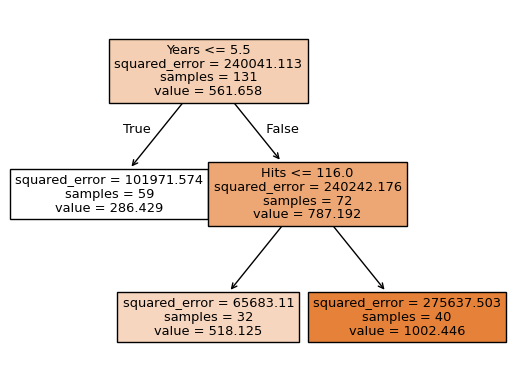

In [4]:
tree.plot_tree(Tree3, 
               feature_names=Tree3.feature_names_in_.tolist(),
               filled=True)

### Regiony 

<img src="Five-Region-Examples.png" width="400"/>

###### Źródło:  James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python, Springer Science+Business Media, New York. https://www.statlearning.com/

Zadanie 1
------
Na podstawie informacji o utworzonym drzewie zdefiniuj regiony $R_1$, $R_2$ i $R_3$.

Zadanie 2
-----
Na bazie przedstawionych poniżej regionów narysuj odpowiadające im drzewo decyzyjne.

<img src="Regions_Task.png" alt="drawing" width="400"/>

#### Jak konstruować regiony w przypadku drzewa dla zadania regresji?
**Cel**: Znaleźć $R_1, R_2, \dots, R_J$, które minimalizują $RSS$.

$$RSS = \sum_{j = 1}^{J} \sum_{i \in R_j}^{}(y_i - \hat{y}_{R_j})^2$$

Niestety nie jesteśmy w stanie rozpatrzeć wszystkich możliwości - zbyt złożone obliczeniowo.

Używamy podejścia *top-down, greedy*:
- *top-down* - zaczynamy od wszystkich obserwacji w jednym regione i następnie w kolejnych krokach rozdzielamy na mniejsze regiony
- *greedy* - na każdym etapie procesu budowania drzewa dokonywany jest najlepszy podział, nie patrzymy w przyszłość

Proces powatrzamy do momentu spełnienia kryterium stopu, np. w liściu nie może być mniej niż 5 obserwacji.



Zadanie 3
----

Przeprowadź eksperyment pokazujący wartość miary MSE na zbiorze treningowym i testowym w zależności od wartości parametru `max_leaf_nodes` - zakres 2:30.

`max_leaf_nodes` - Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes (default=None).

Narysuj wykres przedstawiający wyniki eksperymantu. Jaka jest optymalna wartość parametru `max_leaf_nodes`?

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = []
mse_test = []

...

### 1. Drzewa decyzyjne - klasyfikacja

In [3]:
pima = pd.read_csv("pima.csv")
# pima = pd.read_csv("link do raw GitHub")

Więcej o danych: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

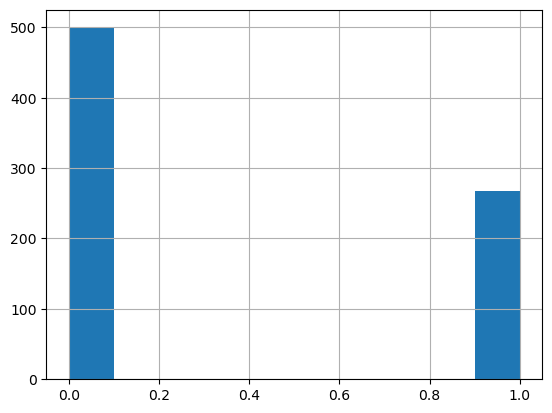

### Kryterium podziału
a) wskaźnik błędu klasyfikacji (*classification error rate*) = udział obserwacji ze zbioru treningowego w danym regionie, które nie należą do przeważającej klasy.
    
$$E = 1 - max_{k}(\hat{p}_{mk}) $$
 
$\hat{p}_{mk}$ - proporcja obserwacji zbioru treningowego w m-tym regionie pochodząca z k-tej klasy
   
b) indeks Giniego   

 $$G = \sum_{k=1}^{K}\hat{p}_{mk}(1-\hat{p}_{mk})$$

Indeks Giniego przyjmuje małe wartości jeżeli $\hat{p}_{mk}$ jest bliski 0 lub 1. Z tego powodu indeks Giniego jest określany jako miara czystości węzła (*node purity*) - mała wartość wskazuje, że węzeł zawiera głównie obserwacje z jednej klasy.

c) entropia
 
 $$D = - \sum_{k=1}^{K}\hat{p}_{mk}log\hat{p}_{mk}$$

 $0 \leq \hat{p}_{mk} \leq 1 \ \rightarrow 0 \leq -\hat{p}_{mk}log\hat{p}_{mk}$

Podobnie jak indeks Giniego przyjmuje małe wartości (bliskie zero) gdy $\hat{p}_{mk}$ jest bliskie 0 lub 1.

##### *Zadanie 1*
-------------------

Przygotuj zbiór danych pima do dalszej pracy. Podziel na `X` i `y`, a następnie na zbiór treningowy i testowy w proporcji 7:3.

##### *Zadanie 2*
-------------------
Zbuduj model drzewa dla danych z Zadania 1.

In [ ]:
from sklearn.tree import DecisionTreeClassifier


DecisionTreeClassifier()

#### Macierz pomyłek (ang. confusion matrix)
<img src="confusion_matrix.png" width="400"/>


##### *Zadanie 3*
-------------------

Wyznacz macierz pomyłek dla predykcji na danych treningowych.

In [ ]:
from sklearn.metrics import confusion_matrix

pred_train = Tree.predict(X_train)
pred_test = Tree.predict(X_test)

confusion_matrix(y_train, pred_train)


#### 3.4 Jak dobry jest nasz model (zadanie klasyfikacji)?

Drzewa Decyzyjne mogą być używane również do klasyfikacji. W przypadku klasyfikacji używamy innych metryk oceny.

**Macierz pomyłek (ang. confusion matrix)**

Macierz pomyłek jest kluczowym narzędziem do oceny modeli klasyfikacyjnych. 


  * **True Positive (TP):** Model przewidział "tak" i była to prawda.
  * **True Negative (TN):** Model przewidział "nie" i była to prawda.
  * **False Positive (FP):** Model przewidział "tak", ale była to pomyłka (fałszywy alarm).
  * **False Negative (FN):** Model przewidział "nie", ale była to pomyłka (przeoczenie).

Metryki bazujące na macierzy pomyłek:

  - **Dokładność (Accuracy):** Jak duży odsetek wszystkich prognoz był poprawny.
    $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

  - **Czułość (Recall) / Pełność:** Jak duży odsetek wszystkich **rzeczywistych pozytywów** został poprawnie zidentyfikowany.
    $$\text{Recall} = \frac{TP}{TP + FN}$$

  - **Precyzja (Precision):** Jak duży odsetek wszystkich **prognoz pozytywnych** był faktycznie poprawny.
    $$\text{Precision} = \frac{TP}{TP + FP}$$

  - **F1-Score:** Średnia harmoniczna Precyzji i Czułości. Jest używany, gdy chcemy równowagi między tymi dwoma metrykami.
    $$\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

-----

Zadanie 4
Na utworzonego modelu wylicz powyższe metryki.